Saving covid.csv to covid.csv


In [0]:

start_data=pd.read_csv("covid.csv")
start_data.head()
print("RAW DATA FROM WHO WEBSITE")

User uploaded file "covid.csv" with length 212562 bytes


,serial,abcd,date,age,gender,city,district,state,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2,KL-AL-P1,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,NaN,NaN,NaN,NaN
1,3,KL-KS-P1,03-02-2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,NaN,NaN,NaN,NaN
2,4,DL-P1,02-03-2020,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,NaN,NaN,NaN
3,5,TS-P1,02-03-2020,24.0,M,Hyderabad,Hyderabad,Telangana,NaN,NaN,NaN,NaN
4,6,NaN,03-03-2020,69.0,M,Jaipur,Jaipur,Rajasthan,NaN,NaN,NaN,NaN


In [0]:
# ********************************* CONVERTING EACH AND EVERY DISTRICT TO ITS GEO COORDINATES USING GEOPANDAS AND GEOPY *********
# 1) THIS FUNCTION IS USED TO PREPROCESS ALL THE 4400 DISTRICT NAMES INTO TWO COLUNMS LATITUDE AND LONGITUDE
#count=0
#xx=[]
#import time
#yy=[]
#for i in df["district"][2000:2600]:
#  try:
#    geolocator = Nominatim(user_agent="geoapiExercises")
#    location = geolocator.geocode(i)
#    xx.append(location.latitude)
#    yy.append(location.longitude)
#    print(location.latitude,location.longitude)
#    print(i)
#  except:
#    xx.append(19.0760)
#    yy.append(72.8777)
#    print("********************************************************")
#    print(i)
#  count+=1
#  time.sleep(1)

In [0]:
#*******************  ALL OF THIS IS USED TO PREPROCESS THE DATA ****************************************
1) #USING FILLNA TO FILL ALL THE NULL VALUES OF AGE WITH THE MEAN
2) #FILLING THE NAN GENDER COLUNM
3)  #LABEL ENCODING THE GENDER COLUNM TO NUMERICAL BINARY 0,1 
4)  #REMOVING UNWANTED COLUNMS
5)  #ADDING POPULATION COLUNM WITH RESPECTIVE TO EACH AND EVERY DISTRICT USING ANOTHER DATASET OF CENSUS 2017 INDIA
6)  #SAVING BACK ALL PREPROCESSED DATA TO COVID_DATA.CSV

# df=pd.read_csv("covid_data.csv")
# df1=pd.read_csv("C:/Users/Tushar goel/Desktop/covid.csv")
# df['age']=df1['age']
# df["age"]=df["age"].fillna(df["age"].mean())
# df["gender"]=df["gender"].fillna('M')
# from sklearn.preprocessing import LabelEncoder
# en=LabelEncoder()
# df["gender"]=en.fit_transform(df["gender"])
# df.rename(columns={"city": "longitude", "district": "latitude"},inplace=True)
# df.drop(['Unnamed: 0'],inplace=True,axis=1)
# df["longitude"].replace({11.0480288: 77.4126}, inplace=True)
# df["latitude"].replace({46.3144754: 23.2599}, inplace=True)
# df.to_csv("covid_data.csv")
# df2=pd.read_csv("district.csv")
# dic=dict()
# list2=[]
# for j in df1['district']:
#          flag=1
#          for i in zip(df2['District name'],df2['Population']):
#                  if(i[0]==j):
#                      dic[j]=i[1]
#                      list2.append(i[1])
#                      flag=0
#          if(flag==1):
#              dic[j]=2255525
#              list2.append(2255525)
# df5=pd.read_csv("covid_data.csv")
# df5['population']=list2[0:4399]
# df5.drop("Unnamed: 0",inplace=True,axis=1)
# df5.to_csv("covid_data.csv")

Saving covid_data.csv to covid_data.csv


AFTER PROCESSING MY DATA LOOKS LIKE
   gender  longitude   latitude      state        age  population
0       1  76.412564   9.488701     Kerala  40.765576     2127789
1       1  75.190450  12.421713     Kerala  40.765576     1307375
2       1  77.309181  28.620477      Delhi  45.000000     2255525
3       1  78.461065  17.388786  Telangana  24.000000     3943323
4       1  75.820349  26.916194  Rajasthan  69.000000     6626178


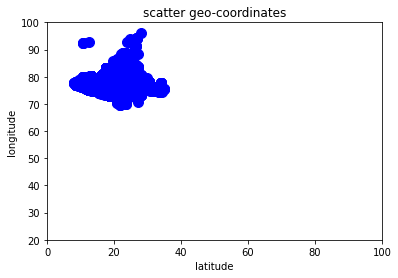

DATA AFTER STANDARD SCALING
     gender  longitude  latitude       age  population
0  0.257729   0.119163 -1.549391  0.000000   -0.528089
1  0.257729   0.050891 -1.140562  0.000000   -0.943453
2  0.257729   0.169251  1.117364  0.546110   -0.463419
3  0.257729   0.233599 -0.448208 -2.162240    0.391089
4  0.257729   0.086079  0.879806  3.641367    1.749381
MY NUMBER OF FEATURES REDUCED TO 2 DIMENTIONAL
   component_1  component_2
0    -1.198119    -0.224889
1    -0.893521    -0.321478
2     0.696768     0.069530
3    -0.657532    -1.551117
4     1.060025     2.602052


In [0]:
from geopy.geocoders import Nominatim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("covid_data.csv")
print("AFTER PROCESSING MY DATA LOOKS LIKE")
df=df.drop(['Unnamed: 0'],axis=1)
print(df.head())
plt.scatter(df['latitude'],df['longitude'],color='blue',s=100)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("scatter geo-coordinates")
plt.xlim(0,100)
plt.ylim(20,100)
plt.show()
check=pd.DataFrame(df['state'])
df=df.drop(['state'],axis=1)
from sklearn.preprocessing import StandardScaler
mx=StandardScaler()
df= pd.DataFrame(mx.fit_transform(df), columns=df.columns)#scaling data
print("DATA AFTER STANDARD SCALING")
print(df.head())
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #APPLYING PRINCIPAL COMONENT ANALYSIS TO TAKE FIRST 2 VECTORS WITH HIGHEST MAGNITUDE
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component_1', 'component_2'])
print("MY NUMBER OF FEATURES REDUCED TO 2 DIMENTIONAL")
print(principalDf.head())



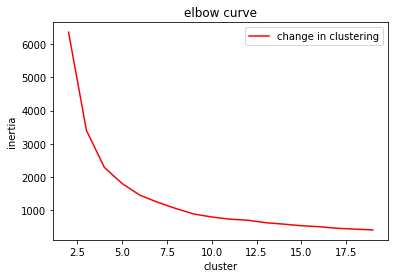

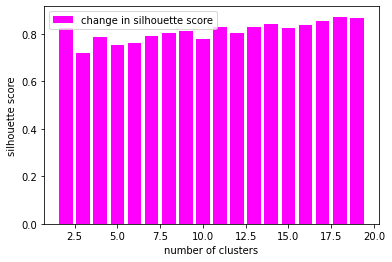

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#CHECKING THE PERFECT NUMBER OF CLUSTERS
df3=pd.DataFrame({'a':principalDf["component_1"],'b':principalDf["component_2"]})
dist=[]
dist2=[]
for i in range(2,20):
  model=KMeans(n_clusters=i)
  model.fit(principalDf)
  df3[f"label{i}"]=model.predict(principalDf)
  di=silhouette_score(df3[["a","b",f"label{i}"]],df3[f"label{i}"])
  dist2.append(di)
  dist.append(model.inertia_)
plt.plot(range(2,20),dist,color="red",label="change in clustering")#USING ELBOW TO CURVE TO DETECT THE CONSTANT CHANGE
plt.xlabel("cluster")
plt.title("elbow curve")
plt.ylabel("inertia")
plt.legend()
plt.show()
plt.bar(range(2,20),dist2,color="MAGENTA",label="change in silhouette score")#IT DETECT THE AVERAGE DISTANCE OF DATAPOINTS FROM THEIR CLUSTER TO THE NEIGBOURING CLUSTER
plt.legend()
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.show()

737.7195654505865


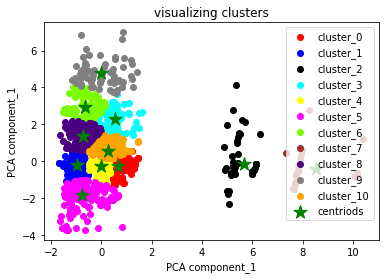


   component_1  component_2  labels
0    -1.198119    -0.224889       1
1    -0.893521    -0.321478       1
2     0.696768     0.069530       0
3    -0.657532    -1.551117       5
4     1.060025     2.602052       3
silhouette_score: 0.8202372748170608
The number of patients lie in cluster with repect to their assigned label


4     1835
1      949
0      641
10     286
5      202
8      134
6      102
3       82
9       69
2       65
7       34
Name: labels, dtype: int64

In [0]:
kmeans = KMeans(n_clusters=11,n_init=11,random_state=10)#APPLYING KMEANS WITH 10 CLUSTERS
model=kmeans.fit(principalDf)
print(kmeans.inertia_)
principalDf['labels']=model.predict(principalDf)
df['labels']=principalDf['labels']
check['labels']=principalDf['labels']
x=kmeans.cluster_centers_#THE COMPONENTS OF CENTRIODS OF CLUSTERS
plt.scatter(principalDf["component_1"][principalDf['labels']==0],principalDf["component_2"][principalDf['labels']==0],color='red',label="cluster_0")
plt.scatter(principalDf["component_1"][principalDf['labels']==1],principalDf["component_2"][principalDf['labels']==1],color='blue',label="cluster_1")
plt.scatter(principalDf["component_1"][principalDf['labels']==2],principalDf["component_2"][principalDf['labels']==2],color="black",label="cluster_2")
plt.scatter(principalDf["component_1"][principalDf['labels']==3],principalDf["component_2"][principalDf['labels']==3],color="cyan",label="cluster_3")
plt.scatter(principalDf["component_1"][principalDf['labels']==4],principalDf["component_2"][principalDf['labels']==4],color="yellow",label="cluster_4")
plt.scatter(principalDf["component_1"][principalDf['labels']==5],principalDf["component_2"][principalDf['labels']==5],color="magenta",label="cluster_5")
plt.scatter(principalDf["component_1"][principalDf['labels']==6],principalDf["component_2"][principalDf['labels']==6],color="lawngreen",label="cluster_6")
plt.scatter(principalDf["component_1"][principalDf['labels']==7],principalDf["component_2"][principalDf['labels']==7],color="brown",label="cluster_7")
plt.scatter(principalDf["component_1"][principalDf['labels']==8],principalDf["component_2"][principalDf['labels']==8],color="indigo",label="cluster_8")
plt.scatter(principalDf["component_1"][principalDf['labels']==9],principalDf["component_2"][principalDf['labels']==9],color="gray",label="cluster_9")
plt.scatter(principalDf["component_1"][principalDf['labels']==10],principalDf["component_2"][principalDf['labels']==10],color="orange",label="cluster_10")
plt.scatter(x[:,0:1],x[:,1:2],marker="*",color="green",s=200,label="centriods")
plt.title("visualizing clusters")
plt.xlabel("PCA component_1")
plt.ylabel("PCA component_1")
plt.legend()
plt.show()
print("")
from sklearn.metrics import silhouette_score
print(principalDf.head())
x=silhouette_score(principalDf, principalDf['labels'])#CALCULATING SILHOUETTE SCORE FOR 7 CLUSTERS
print(f"silhouette_score: {x}")
print("The number of patients lie in cluster with repect to their assigned label")
principalDf['labels'].value_counts()


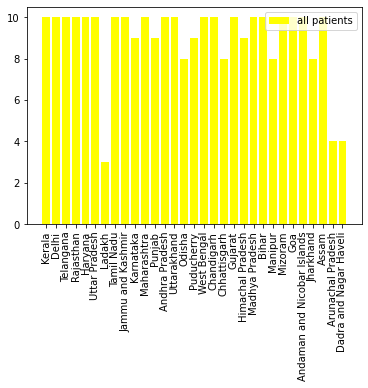

In [0]:
plt.bar(check['state'][:4399],check['labels'][:4399],label="all patients",color="yellow")
plt.legend()
plt.xticks(rotation=90)
plt.show()


     gender  longitude  latitude       age  population  labels
0  0.257729   0.119163 -1.549391  0.000000   -0.528089       1
1  0.257729   0.050891 -1.140562  0.000000   -0.943453       1
2  0.257729   0.169251  1.117364  0.546110   -0.463419       0
3  0.257729   0.233599 -0.448208 -2.162240    0.391089       5
4  0.257729   0.086079  0.879806  3.641367    1.749381       3


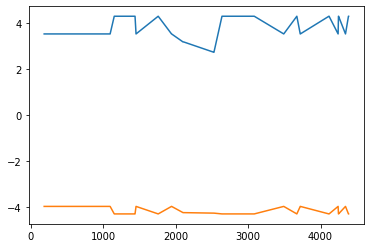

In [110]:
print(df.head())
x=df[['latitude','longitude']][df['labels']==2]
plt.plot(x)
plt.show()


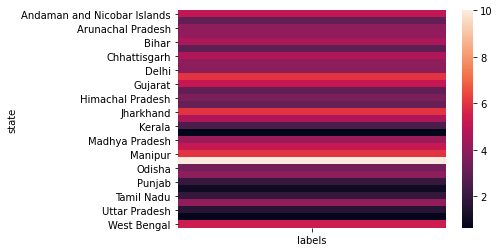

In [112]:
import seaborn as sns
heatmap1_data = pd.pivot_table(check, values='labels', 
                     index=['state'])
sns.heatmap(heatmap1_data)